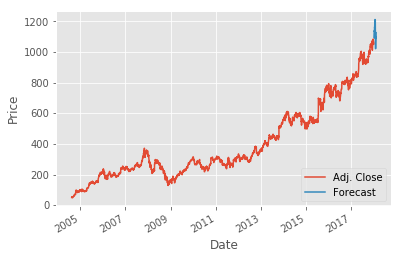

In [3]:
# Linear regression model to forecast stock prices
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')# Matplotlib styles
quandl.get("NBSC/A0N0A03_110000_P_A", authtoken="xhkWXm7LTsLNxk4Ubx4q")
df = quandl.get("WIKI/GOOGL")#Getting dataset from quandl databank

df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]#Listing out all the columns available in our dataset
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0#Creating a new column which stores the High Low percentage 
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0#Creating another column which stores the percentage change of the stocks

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]#Selecting the required columns for making the predictions
forecast_col = 'Adj. Close'#This column is the forecast column which we wil predict

df.fillna(value=-99999, inplace=True)#Filling not number cells with large negative value
forecast_out = int(math.ceil(0.01 * len(df)))#Size of the input dataset taken into consideration
df['label'] = df[forecast_col].shift(-forecast_out)#Creating another column by shifting the Adj. Close column

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)#Splitting data set into random numbers of train and test subsets
clf = LinearRegression(n_jobs=-1)#Applying scikit learn Linear Regression on the train subset
clf.fit(X_train, y_train)#Fitting the training data
confidence = clf.score(X_test, y_test)#Finding the accuracy of model on test dataset

forecast_set = clf.predict(X_lately)#Predicting the stock for future dates
df['Forecast'] = np.nan#New column for forecasting data

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()#Time taken from UNIX timestamp started from 1970
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]#Creating column to store the predicted values

df['Adj. Close'].plot()#Plotting the graph for predicted value for next 30days approx
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()